# Diplodatos Kaggle Competition

We present this peace of code to create the baseline for the competition, and as an example of how to deal with these kind of problems. The main goals are that you:

1. Learn
1. Try different models and see which one fits the best the given data
1. Get a higher score than the given one in the current baseline example
1. Try to get the highest score in the class :)

In [1]:
# Import the required packages
import os

import numpy as np
import pandas as pd
from time import time

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [2]:
# load the given labels
breed = pd.read_csv('../data/breed_labels.csv')
color = pd.read_csv('../data/color_labels.csv')
state = pd.read_csv('../data/state_labels.csv')

Now we take a look at the labels, just to understand what these are

In [3]:
breed.head()

,BreedID,Type,BreedName
0,1,1,Affenpinscher
1,2,1,Afghan Hound
2,3,1,Airedale Terrier
3,4,1,Akbash
4,5,1,Akita


In [4]:
color.head()

,ColorID,ColorName
0,1,Black
1,2,Brown
2,3,Golden
3,4,Yellow
4,5,Cream


In [5]:
state

,StateID,StateName
0,41336,Johor
1,41325,Kedah
2,41367,Kelantan
3,41401,Kuala Lumpur
4,41415,Labuan
5,41324,Melaka
6,41332,Negeri Sembilan
7,41335,Pahang
8,41330,Perak
9,41380,Perlis


And now we are ready to deal with the *original* dataset...

In [6]:
original_df = pd.read_csv('../data/train.csv')

In [7]:
original_df.columns

Index(['Type', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'Description',
       'AdoptionSpeed', 'PID'],
      dtype='object')

In [8]:
original_df.describe(include='all')

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,Description,AdoptionSpeed,PID
count,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10576,10582.000000,10582.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10002,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,For Adoption,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,118,NaN,NaN
mean,1.454734,10.520412,265.469854,74.388868,1.779059,2.230675,3.236912,1.856738,1.860518,1.460971,1.729730,1.566528,1.912115,1.036666,1.584011,20.809960,41345.994613,NaN,2.518900,7477.025799
std,0.497970,18.374027,60.121490,123.434010,0.684763,1.743985,2.748595,2.974465,0.547535,0.593843,0.670791,0.701482,0.564041,0.198228,1.488348,78.397243,32.409109,NaN,1.176018,4310.921553
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,41324.000000,NaN,0.000000,0.000000
25%,1.000000,2.000000,265.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,NaN,2.000000,3768.250000
50%,1.000000,3.000000,266.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,NaN,2.000000,7473.500000
75%,2.000000,12.000000,307.000000,188.000000,2.000000,3.000000,6.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,41401.000000,NaN,4.000000,11200.750000


In [9]:
# get the number of missing data points per column
missing_values_count = original_df.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[missing_values_count > 0]

Description    6
dtype: int64

In [10]:
original_df = original_df.fillna('0')

# get the number of missing data points per column
missing_values_count = original_df.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[missing_values_count > 0]

Series([], dtype: int64)

In [11]:
from sklearn import preprocessing

column='Description'
# Create a label (category) encoder object
le = preprocessing.LabelEncoder()
# Fit the encoder to the pandas column
le.fit(original_df[column])

# Apply the fitted encoder to the pandas column
original_df[column] = le.transform(original_df[column]) 

In [12]:
X_orig = original_df.drop('AdoptionSpeed', axis=1)
#X_orig = X_orig.drop('Description', axis=1)
y_orig = original_df['AdoptionSpeed']

XX_orig= pd.read_csv('../data/test.csv')
#XX_orig = XX_orig.drop('Description', axis=1)

In [13]:
# get the number of missing data points per column
missing_values_count = XX_orig.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[missing_values_count > 0]

Description    6
dtype: int64

In [14]:
XX_orig = XX_orig.fillna('0')

# get the number of missing data points per column
missing_values_count = XX_orig.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[missing_values_count > 0]

Series([], dtype: int64)

In [16]:
from sklearn import preprocessing

column='Description'
# Create a label (category) encoder object
le2 = preprocessing.LabelEncoder()
# Fit the encoder to the pandas column
le2.fit(XX_orig[column])

# Apply the fitted encoder to the pandas column
XX_orig[column] = le2.transform(XX_orig[column])

Create a function to transform the datasets. This is done by means of a function so that the transformations are the same for the training and testing datasets... We replace the encodings just to make it easy to "visualize" the data

In [20]:
def transform_data(train_data_fname, test_data_fname):
    def transform_columns(df):
        df = df.drop(["Description"], axis=1)
        df.Type = df.Type.replace({1: 'Dog', 2: 'Cat'})
        df.Gender = df.Gender.replace({1:'Male', 2:'Female', 3:'Mixed'})
        df.MaturitySize = df.MaturitySize.replace({1:'S', 2:'M', 3:'L', 4:'XL', 0:'N/A'})
        df.FurLength = df.FurLength.replace({1:'S', 2:'M', 3:'L', 0:'N/A'})
        df.Vaccinated = df.Vaccinated.replace({1:'T', 2:'N', 3:'N/A'})
        df.Dewormed = df.Dewormed.replace({1:'T', 2:'F', 3:'N/A'})
        df.Sterilized = df.Sterilized.replace({1:'T', 2:'F', 3:'N/A'})
        df.Health = df.Health.replace({1:'Healthy', 2: 'MinorInjury', 3:'SeriousInjury', 0: 'N/A'})
        df.Color1 = df.Color1.replace(dict(list(zip(color.ColorID, color.ColorName)) + [(0, "N/A")]))
        df.Color2 = df.Color2.replace(dict(list(zip(color.ColorID, color.ColorName)) + [(0, "N/A")]))
        df.Color3 = df.Color3.replace(dict(list(zip(color.ColorID, color.ColorName)) + [(0, "N/A")]))
        df.Breed1 = df.Breed1.replace(dict(list(zip(breed.BreedID, breed.BreedName)) + [(0, "N/A")]))
        df.Breed2 = df.Breed2.replace(dict(list(zip(breed.BreedID, breed.BreedName)) + [(0, "N/A")]))
        df.State = df.State.replace(dict(list(zip(state.StateID, state.StateName)) + [(0, "N/A")]))
        return df
    
    df_train = pd.read_csv(train_data_fname)
    df_train = transform_columns(df_train)
    df_test = pd.read_csv(test_data_fname)
    df_test = transform_columns(df_test)
    
    df = pd.concat([df_train, df_test], sort=True)

    # set dummy variables for everything
    # except from Age, Quantity, Fee
    df = pd.get_dummies(df)
    # get train and test back
    n = len(df_train)
    df_train = df.iloc[:n]
    df_test = df.iloc[n:]
    
    y = df_train['AdoptionSpeed']
    X = df_train.drop('AdoptionSpeed', axis=1)
    yy = None
    XX = df_test.drop('AdoptionSpeed', axis=1)

    return X, y, XX, yy

Load the data...

In [21]:
X, y, XX, yy = transform_data("../data/train.csv", "../data/test.csv")

In [22]:
X.describe(include='all')

,Age,Fee,PID,Quantity,Breed1_Abyssinian,Breed1_Affenpinscher,Breed1_Airedale Terrier,Breed1_Akita,Breed1_American Bulldog,Breed1_American Curl,...,State_Selangor,State_Terengganu,Sterilized_F,Sterilized_N/A,Sterilized_T,Type_Cat,Type_Dog,Vaccinated_N,Vaccinated_N/A,Vaccinated_T
count,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.0,10582.000000,...,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000
mean,10.520412,20.809960,7477.025799,1.584011,0.001985,0.000189,0.000095,0.000095,0.0,0.001040,...,0.580042,0.001985,0.674164,0.118976,0.206861,0.454734,0.545266,0.477036,0.126347,0.396617
std,18.374027,78.397243,4310.921553,1.488348,0.044506,0.013747,0.009721,0.009721,0.0,0.032226,...,0.493575,0.044506,0.468709,0.323775,0.405074,0.497970,0.497970,0.499496,0.332255,0.489218
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,3768.250000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,7473.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,12.000000,0.000000,11200.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,255.000000,3000.000000,14992.000000,20.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#from sklearn.random_projection import sparse_random_matrix

X1 = X  #independent columns
y1 = y  #target column

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X1,y1)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X1.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(30,'Score'))  #print 10 best features
# df1 = df[['a','b']]
f1 = featureScores.nlargest(30,'Score')
X1 = X[f1.Specs]
XX1 = XX[f1.Specs]
X1

                            Specs        Score
2                             PID  7119.893415
0                             Age  4038.298886
1                             Fee   474.195482
367                  Sterilized_T   272.692491
108            Breed1_Mixed Breed   179.529390
365                  Sterilized_F   166.678483
366                Sterilized_N/A   121.709192
338                   FurLength_L   107.117559
370                  Vaccinated_N    95.307629
372                  Vaccinated_T    81.853221
3                        Quantity    78.162299
121                Breed1_Persian    70.236724
349                MaturitySize_S    70.136279
368                      Type_Cat    63.334157
356                  State_Melaka    59.796090
335                    Dewormed_F    55.436834
369                      Type_Dog    52.818711
211                Breed2_Burmese    49.396361
342                   Gender_Male    46.744874
147                Breed1_Siamese    38.916466
200          

,PID,Age,Fee,Sterilized_T,Breed1_Mixed Breed,Sterilized_F,Sterilized_N/A,FurLength_L,Vaccinated_N,Vaccinated_T,...,Breed2_Bengal,Breed1_Chinese Crested Dog,Breed1_Sphynx (hairless cat),Breed2_Exotic Shorthair,State_Selangor,Breed2_Mixed Breed,Breed1_Poodle,MaturitySize_M,Breed1_Domestic Medium Hair,Breed2_Silky Terrier
0,0,3,100,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,3,4,150,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,4,1,0,0,1,1,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
3,5,3,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
4,6,12,300,0,0,0,1,1,1,0,...,0,0,0,0,1,0,0,1,0,0
5,8,2,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,1,1,0
6,10,2,0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
7,13,2,0,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0
8,14,3,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,15,78,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0


C:\Users\javi\.conda\envs\diplodatos\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


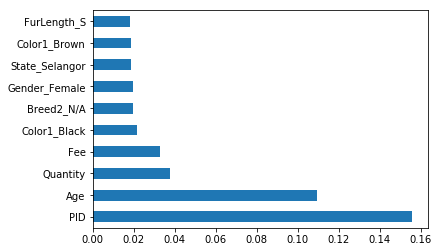

In [25]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
#print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

Text(0.5, 1.0, 'Compression')

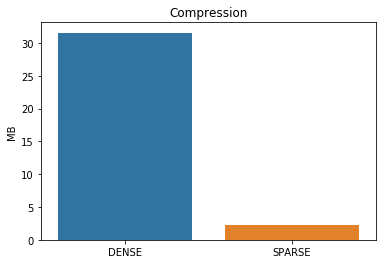

In [26]:
from scipy.sparse import csr_matrix
import seaborn as sns

sparse_X = csr_matrix(X)
dense_size = np.array(X).nbytes/1e6
sparse_size = (sparse_X.data.nbytes + sparse_X.indptr.nbytes + sparse_X.indices.nbytes)/1e6

sns.barplot(['DENSE', 'SPARSE'], [dense_size, sparse_size])
plt.ylabel('MB')
plt.title('Compression')


In [27]:
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

X_t = X_orig.drop(["PID"], axis=1)
#scaler = Normalizer().fit(X_t)
scaler = StandardScaler().fit(X_t)
std_X_or = scaler.transform(X_t)

C:\Users\javi\.conda\envs\diplodatos\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\javi\.conda\envs\diplodatos\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  import sys


In [29]:
# split training dataset into test and train 
# (we won't be using testing sets here, because of the cross-validation; but it couldn be useful)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Create the model and evaluate it

In [30]:
from sklearn.ensemble import RandomForestClassifier as RFC

results = pd.DataFrame(columns=('clf', 'best_acc'))

tree_clf2 = RFC(bootstrap=False, class_weight=None,
            criterion='entropy', max_depth=20, max_features=13,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=19, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=None, oob_score=False,
            random_state=42, verbose=0, warm_start=True)

tree_clf2.fit(X_train, y_train)
# tree_clf2.fit(X_train.drop(["PID"], axis=1), y_train)
results = results.append({'clf': tree_clf2}, ignore_index=True)

print('Accuracy para entrenamiento: %.2f' % 
      accuracy_score(y_train, tree_clf2.predict(X_train)))
print('Accuracy para validación: %.2f' %
      accuracy_score(y_test, tree_clf2.predict(X_test)))

Accuracy para entrenamiento: 0.72
Accuracy para validación: 0.38


In [31]:
results = pd.DataFrame(columns=('clf', 'best_acc'))

## Random Forest - Classification
from sklearn.ensemble import RandomForestClassifier as RFC
from scipy.stats import randint as sp_randint

tree = RFC(bootstrap=False, class_weight=None, criterion='entropy',
            max_depth=25, max_features=12, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=8,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

tree_param = {'bootstrap': [True, False], 'max_depth': (10, 15, 20, 25), 'max_features': (4, 8, 12),
              'min_samples_split': (3, 7, 11, 15), 'n_estimators': (20, 30)}

#tree_param = {'n_estimators': (10, 20, 30, 40)}

tree_clf = GridSearchCV(tree, tree_param, scoring='accuracy', cv=10, iid=False)

start = time()
tree_clf.fit(X_train.drop(["PID"], axis=1), y_train)
best_tree_clf = tree_clf.best_estimator_
print('Best Decision Tree accuracy: ', tree_clf.best_score_)
print(best_tree_clf)
results = results.append({'clf': best_tree_clf, 'best_acc': tree_clf.best_score_}, ignore_index=True)

print('The best classifier so far is: ')
print(results.loc[results['best_acc'].idxmax()]['clf'])

print("Regression Tree tomó %.2f segundos para %d configuraciones de parámetros candidatos."
      % (time() - start, len(tree_clf.cv_results_['params'])))
for i in range(len(tree_clf.cv_results_['params'])+1):
    candidatos = np.flatnonzero(tree_clf.cv_results_['rank_test_score'] == i)
    for candidato in candidatos:
        print("El modelo con el ranking: {0}".format(i))
        print("Scores de validación Medios: {0:.3f} (std: {1:.3f})".format(
                  tree_clf.cv_results_['mean_test_score'][candidato],
                  tree_clf.cv_results_['std_test_score'][candidato]))
        print("Parametros: {0}".format(tree_clf.cv_results_['params'][candidato]))
        print("")

Best Decision Tree accuracy:  0.38220053825783795
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=20, max_features=12, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=7,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)
The best classifier so far is: 
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=20, max_features=12, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=7,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)
Regression Tree tomó 696.51 segundos para 192 configuraciones de parámetros candidatos.
El modelo con el

In [36]:
 results = pd.DataFrame(columns=('clf', 'best_acc'))

## Random Forest - Classification
from sklearn.ensemble import RandomForestClassifier as RFC
from scipy.stats import randint as sp_randint

tree_param_dist = {'max_depth': sp_randint(1, 25),
                   'max_features': sp_randint(2, 15),
                   'min_samples_split': sp_randint(2, 25),
                   'bootstrap': [True, False],
                   'warm_start': [True, False],
                   'criterion': ['gini', 'entropy']}

tree = RFC(random_state=42, n_estimators=100, min_samples_leaf=1)

tree_clf = RandomizedSearchCV(tree, param_distributions=tree_param_dist, scoring='accuracy', n_iter=50, cv=10, iid=False) #Javier: Leer y probar otros "cv". En general se usan 3, 5 y 10.

start = time()
tree_clf.fit(X_train.drop(["PID"], axis=1), y_train)

best_tree_clf = tree_clf.best_estimator_
print('Best Decision Tree accuracy: ', tree_clf.best_score_)
print(best_tree_clf)
results = results.append({'clf': best_tree_clf, 'best_acc': tree_clf.best_score_}, ignore_index=True)

print('The best classifier so far is: ')
print(results.loc[results['best_acc'].idxmax()]['clf'])

print("Regression Tree tomó %.2f segundos para %d configuraciones de parámetros candidatos."
      % (time() - start, len(tree_clf.cv_results_['params'])))
for i in range(len(tree_clf.cv_results_['params'])+1):
    candidatos = np.flatnonzero(tree_clf.cv_results_['rank_test_score'] == i)
    for candidato in candidatos:
        print("El modelo con el ranking: {0}".format(i))
        print("Scores de validación Medios: {0:.3f} (std: {1:.3f})".format(
                  tree_clf.cv_results_['mean_test_score'][candidato],
                  tree_clf.cv_results_['std_test_score'][candidato]))
        print("Parametros: {0}".format(tree_clf.cv_results_['params'][candidato]))
        print("")

#0.39573471267590066

Best Decision Tree accuracy:  0.39293284836378467
RandomForestClassifier(bootstrap=False, class_weight=None,
            criterion='entropy', max_depth=19, max_features=14,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=6, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=None, oob_score=False,
            random_state=42, verbose=0, warm_start=True)
The best classifier so far is: 
RandomForestClassifier(bootstrap=False, class_weight=None,
            criterion='entropy', max_depth=19, max_features=14,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=6, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=None, oob_score=False,
            random_state=42, verbose=0, warm_start=True)
Regression Tree tomó 585.60 segundos para 50 configuraciones de parámetros can

In [32]:
results = pd.DataFrame(columns=('clf', 'best_acc'))

## Random Forest - Classification
from sklearn.ensemble import ExtraTreesClassifier as EFC

tree_param_dist = {'max_depth': sp_randint(1, 25),
                   'max_features': sp_randint(2, 15),
                   'min_samples_split': sp_randint(2, 25),
                   'bootstrap': [True, False],
                   'warm_start': [True, False],
                   'criterion': ['gini', 'entropy']}

tree = EFC(random_state=42, n_estimators=30, min_samples_leaf=1)

tree_clf = RandomizedSearchCV(tree, param_distributions=tree_param_dist, scoring='accuracy', n_iter=50, cv=10, iid=False) #Javier: Leer y probar otros "cv". En general se usan 3, 5 y 10.

start = time()
tree_clf.fit(X_train.drop(["PID"], axis=1), y_train)

best_tree_clf = tree_clf.best_estimator_
print('Best Decision Tree accuracy: ', tree_clf.best_score_)
print(best_tree_clf)
results = results.append({'clf': best_tree_clf, 'best_acc': tree_clf.best_score_}, ignore_index=True)

print('The best classifier so far is: ')
print(results.loc[results['best_acc'].idxmax()]['clf'])

print("Regression Tree tomó %.2f segundos para %d configuraciones de parámetros candidatos."
      % (time() - start, len(tree_clf.cv_results_['params'])))
for i in range(len(tree_clf.cv_results_['params'])+1):
    candidatos = np.flatnonzero(tree_clf.cv_results_['rank_test_score'] == i)
    for candidato in candidatos:
        print("El modelo con el ranking: {0}".format(i))
        print("Scores de validación Medios: {0:.3f} (std: {1:.3f})".format(
                  tree_clf.cv_results_['mean_test_score'][candidato],
                  tree_clf.cv_results_['std_test_score'][candidato]))
        print("Parametros: {0}".format(tree_clf.cv_results_['params'][candidato]))
        print("")

#0.39573471267590066

Best Decision Tree accuracy:  0.3664026323544688
ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=21, max_features=11, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=True)
The best classifier so far is: 
ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=21, max_features=11, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=True)
Regression Tree tomó 144.40 segundos para 50 configuraciones de parámetros candidatos.
El modelo con el ranking: 1
Scores d

In [49]:
results = pd.DataFrame(columns=('clf', 'best_acc'))

## Arbol de Decisión - Classification
from sklearn.tree import DecisionTreeClassifier as DTC #Javier: Acá probaron Árbol de Decisiones. Leer y probar otros parámetros.
#tree_param = {'criterion':('gini', 'entropy')}
tree_param = {'min_samples_split':(5, 10, 50), 'max_depth':(3, 5, 7),
              'min_weight_fraction_leaf':(0.012, 0.011, 0.01, 0.009, 0.008, 0.007)}
tree = DTC(random_state=42, splitter = 'best', criterion= 'gini', min_samples_leaf=1)
tree_clf = GridSearchCV(tree, tree_param, scoring='accuracy', cv=10, iid=False) #Javier: Leer y probar otros "cv". En general se usan 3, 5 y 10.
start = time()
tree_clf.fit(X_train.drop(["PID"], axis=1), y_train)
best_tree_clf = tree_clf.best_estimator_
print('Best Decision Tree accuracy: ', tree_clf.best_score_)
print(best_tree_clf)
results = results.append({'clf': best_tree_clf, 'best_acc': tree_clf.best_score_}, ignore_index=True)

print('The best classifier so far is: ')
print(results.loc[results['best_acc'].idxmax()]['clf'])

print("Regression Tree tomó %.2f segundos para %d configuraciones de parámetros candidatos."
      % (time() - start, len(tree_clf.cv_results_['params'])))
for i in range(len(tree_clf.cv_results_['params'])+1):
    candidatos = np.flatnonzero(tree_clf.cv_results_['rank_test_score'] == i)
    for candidato in candidatos:
        print("El modelo con el ranking: {0}".format(i))
        print("Scores de validación Medios: {0:.3f} (std: {1:.3f})".format(
                  tree_clf.cv_results_['mean_test_score'][candidato],
                  tree_clf.cv_results_['std_test_score'][candidato]))
        print("Parametros: {0}".format(tree_clf.cv_results_['params'][candidato]))
        print("")

Best Decision Tree accuracy:  0.38321528943351063
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.01, presort=False, random_state=42,
            splitter='best')
The best classifier so far is: 
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.01, presort=False, random_state=42,
            splitter='best')
Regression Tree tomó 15.04 segundos para 54 configuraciones de parámetros candidatos.
El modelo con el ranking: 1
Scores de validación Medios: 0.383 (std: 0.014)
Parametros: {'max_depth': 5, 'min_samples_split': 5, 'min_weight

In [33]:
results = pd.DataFrame(columns=('clf', 'best_acc'))

from sklearn.ensemble import BaggingClassifier

bagg_param = {'max_samples': (0.5, 0.7, 0.9, 1.0),
              'max_features': (0.5, 0.7, 0.9, 1.0),
              'bootstrap':(True, False), 'n_estimators': (25, 35)}

bagging = BaggingClassifier(random_state=42)

bagg_clf = GridSearchCV(bagging, bagg_param, scoring='accuracy', cv=10, iid=False)

start = time()
bagg_clf.fit(X_train.drop(["PID"], axis=1), y_train)

best_bagg_clf = bagg_clf.best_estimator_
print('Best Bagging accuracy: ', bagg_clf.best_score_)
print(best_bagg_clf)
results = results.append({'clf': best_bagg_clf, 'best_acc': bagg_clf.best_score_}, ignore_index=True)

print('The best classifier so far is: ')
print(results.loc[results['best_acc'].idxmax()]['clf'])

print("Bagging tomó %.2f segundos para %d configuraciones de parámetros candidatos."
      % (time() - start, len(bagg_clf.cv_results_['params'])))
for i in range(len(bagg_clf.cv_results_['params'])+1):
    candidatos = np.flatnonzero(bagg_clf.cv_results_['rank_test_score'] == i)
    for candidato in candidatos:
        print("El modelo con el ranking: {0}".format(i))
        print("Scores de validación Medios: {0:.3f} (std: {1:.3f})".format(
                  bagg_clf.cv_results_['mean_test_score'][candidato],
                  bagg_clf.cv_results_['std_test_score'][candidato]))
        print("Parametros: {0}".format(bagg_clf.cv_results_['params'][candidato]))
        print("")

Best Bagging accuracy:  0.37585958193489494
BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=0.5, max_samples=0.5,
         n_estimators=35, n_jobs=None, oob_score=False, random_state=42,
         verbose=0, warm_start=False)
The best classifier so far is: 
BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=0.5, max_samples=0.5,
         n_estimators=35, n_jobs=None, oob_score=False, random_state=42,
         verbose=0, warm_start=False)
Bagging tomó 2104.10 segundos para 64 configuraciones de parámetros candidatos.
El modelo con el ranking: 1
Scores de validación Medios: 0.376 (std: 0.022)
Parametros: {'bootstrap': True, 'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 35}

El modelo con el ranking: 2
Scores de validación Medios: 0.374 (std: 0.018)
Parametros: {'bootstrap': True, 'max_features': 1.0, 'max_samples': 0.7, 'n_estimators': 35}

El modelo con el ranking: 3
Scor

In [34]:
results = pd.DataFrame(columns=('clf', 'best_acc'))

## Multi Layer Perceptron MLP - Classification
from sklearn.neural_network import MLPClassifier as MLPC

mlpc_clf = MLPC(random_state=42, hidden_layer_sizes=(100, ), activation='relu', solver='adam', 
                alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, 
                power_t=0.5, max_iter=200, shuffle=True, tol=0.0001, verbose=False, 
                warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, 
                validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10)

start = time()
mlpc_clf.fit(X_train.drop(["PID"], axis=1), y_train)

results = results.append({'clf': mlpc_clf}, ignore_index=True)

print('Accuracy para entrenamiento: %.2f' % 
      accuracy_score(y_train, mlpc_clf.predict(X_train.drop(["PID"], axis=1))))
print('Accuracy para validación: %.2f' %
      accuracy_score(y_test, mlpc_clf.predict(X_test.drop(["PID"], axis=1))))

Accuracy para entrenamiento: 0.63
Accuracy para validación: 0.35


C:\Users\javi\.conda\envs\diplodatos\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [37]:
results = pd.DataFrame(columns=('clf', 'best_acc'))

## Naive Bayes
from sklearn.naive_bayes import GaussianNB

parameters_gnb = {}

gnb = GaussianNB()
gnb_clf = GridSearchCV(gnb, parameters_gnb, cv=10, iid = False, return_train_score = True)
start = time()
gnb_clf.fit(X_train.drop(["PID"], axis=1), y_train)
best_gnb_clf = gnb_clf.best_estimator_

print('Best Naive Bayes accuracy: ', gnb_clf.best_score_)
print(best_gnb_clf)
results = results.append({'clf': best_gnb_clf, 'best_acc': gnb_clf.best_score_}, ignore_index=True)

print('The best classifier so far is: ')
print(results.loc[results['best_acc'].idxmax()]['clf'])
print("")

print("Naive Bayes tomó %.2f segundos para %d configuraciones de parámetros candidatos."
      % (time() - start, len(gnb_clf.cv_results_['params'])))
for i in range(len(gnb_clf.cv_results_['params'])+1):
    candidatos = np.flatnonzero(gnb_clf.cv_results_['rank_test_score'] == i)
    for candidato in candidatos:
        print("El modelo con el ranking: {0}".format(i))
        print("Scores de validación Medios: {0:.3f} (std: {1:.3f})".format(
                  gnb_clf.cv_results_['mean_test_score'][candidato],
                  gnb_clf.cv_results_['std_test_score'][candidato]))
        print("Parametros: {0}".format(gnb_clf.cv_results_['params'][candidato]))
        print("")


Best Naive Bayes accuracy:  0.3342036009998185
GaussianNB(priors=None, var_smoothing=1e-09)
The best classifier so far is: 
GaussianNB(priors=None, var_smoothing=1e-09)

Naive Bayes tomó 0.35 segundos para 1 configuraciones de parámetros candidatos.
El modelo con el ranking: 1
Scores de validación Medios: 0.334 (std: 0.013)
Parametros: {}



In [26]:
results = pd.DataFrame(columns=('clf', 'best_acc'))

## Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42)
lr_param = {'penalty':('l2', 'l1'), 'C':[1.0], 'warm_start':[True, False]}

lr_clf = RandomizedSearchCV(lr, param_distributions=lr_param, scoring='accuracy', n_iter=50, cv=10, iid=False)

start = time()
lr_clf.fit(X_train.drop(["PID"], axis=1), y_train)
best_lr_clf = lr_clf.best_estimator_
print('Best Log Reg accuracy: ', lr_clf.best_score_)
print(best_lr_clf)
results = results.append({'clf': best_lr_clf, 'best_acc': lr_clf.best_score_}, ignore_index=True)

print('The best classifier so far is: ')
print(results.loc[results['best_acc'].idxmax()]['clf'])

print("Log Reg tomó %.2f segundos para %d configuraciones de parámetros candidatos."
      % (time() - start, len(lr_clf.cv_results_['params'])))
for i in range(len(lr_clf.cv_results_['params'])+1):
    candidatos = np.flatnonzero(lr_clf.cv_results_['rank_test_score'] == i)
    for candidato in candidatos:
        print("El modelo con el ranking: {0}".format(i))
        print("Scores de validación Medios: {0:.3f} (std: {1:.3f})".format(
                  lr_clf.cv_results_['mean_test_score'][candidato],
                  lr_clf.cv_results_['std_test_score'][candidato]))
        print("Parametros: {0}".format(lr_clf.cv_results_['params'][candidato]))
        print("")


C:\Users\javi\.conda\envs\diplodatos\lib\site-packages\sklearn\model_selection\_search.py:271: UserWarning: The total space of parameters 4 is smaller than n_iter=50. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
C:\Users\javi\.conda\envs\diplodatos\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\javi\.conda\envs\diplodatos\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\javi\.conda\envs\diplodatos\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\javi\.conda\envs

C:\Users\javi\.conda\envs\diplodatos\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\javi\.conda\envs\diplodatos\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\javi\.conda\envs\diplodatos\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\javi\.conda\envs\diplodatos\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\javi\.conda\envs\diplodatos\lib\site-packages\skl

C:\Users\javi\.conda\envs\diplodatos\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\javi\.conda\envs\diplodatos\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\javi\.conda\envs\diplodatos\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\javi\.conda\envs\diplodatos\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\javi\.conda\envs\diplodatos\lib\site-packages\skl

Best Log Reg accuracy:  0.3383269235154688
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=True)
The best classifier so far is: 
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=True)
Log Reg tomó 58.24 segundos para 4 configuraciones de parámetros candidatos.
El modelo con el ranking: 1
Scores de validación Medios: 0.338 (std: 0.015)
Parametros: {'warm_start': True, 'penalty': 'l1', 'C': 1.0}

El modelo con el ranking: 1
Scores de validación Medios: 0.338 (std: 0.015)
Parametros: {'warm_start': False, 'penalty': 'l1', 'C': 1.0}

El modelo con el ranking: 3
Scores de validación Me

In [27]:
results = pd.DataFrame(columns=('clf', 'best_acc'))

## Ridge Classifier
from sklearn.linear_model import RidgeClassifier

rc_param = {}
rc = RidgeClassifier(tol=0.0001, solver="lsqr", random_state=42)

rc_clf = RandomizedSearchCV(rc, param_distributions=rc_param, scoring='accuracy', n_iter=50, cv=10, iid=False)

start = time()
rc_clf.fit(X_train.drop(["PID"], axis=1), y_train)
best_rc_clf = rc_clf.best_estimator_
print('Best Log Reg accuracy: ', rc_clf.best_score_)
print(best_rc_clf)
results = results.append({'clf': best_rc_clf, 'best_acc': rc_clf.best_score_}, ignore_index=True)

print('The best classifier so far is: ')
print(results.loc[results['best_acc'].idxmax()]['clf'])

print("Log Reg tomó %.2f segundos para %d configuraciones de parámetros candidatos."
      % (time() - start, len(rc_clf.cv_results_['params'])))
for i in range(len(rc_clf.cv_results_['params'])+1):
    candidatos = np.flatnonzero(rc_clf.cv_results_['rank_test_score'] == i)
    for candidato in candidatos:
        print("El modelo con el ranking: {0}".format(i))
        print("Scores de validación Medios: {0:.3f} (std: {1:.3f})".format(
                  rc_clf.cv_results_['mean_test_score'][candidato],
                  rc_clf.cv_results_['std_test_score'][candidato]))
        print("Parametros: {0}".format(rc_clf.cv_results_['params'][candidato]))
        print("")


C:\Users\javi\.conda\envs\diplodatos\lib\site-packages\sklearn\model_selection\_search.py:271: UserWarning: The total space of parameters 1 is smaller than n_iter=50. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Best Log Reg accuracy:  0.3306502236381582
RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=42, solver='lsqr',
        tol=0.0001)
The best classifier so far is: 
RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=42, solver='lsqr',
        tol=0.0001)
Log Reg tomó 0.34 segundos para 1 configuraciones de parámetros candidatos.
El modelo con el ranking: 1
Scores de validación Medios: 0.331 (std: 0.012)
Parametros: {}



In [35]:
results = pd.DataFrame(columns=('clf', 'best_acc'))

## Stochastic Gradient
from sklearn.linear_model import SGDClassifier

parameters_SGDC = {'loss':('hinge', 'log'), 'learning_rate':('adaptive', 'optimal', 'invscaling'),
              'penalty':('l2', 'l1', 'elasticnet'), 'alpha':[0.0001], 'max_iter': [10000], 
              'eta0': [0.1], 'tol': [0.001]}
SGDC = SGDClassifier(random_state=42)
SGDC_clf = GridSearchCV(SGDC, parameters_SGDC, cv=5, iid = False, return_train_score = True)
start = time()
SGDC_clf.fit(X_train.drop(["PID"], axis=1), y_train)
best_SGDC_clf = SGDC_clf.best_estimator_

print('Best SGDC accuracy: ', SGDC_clf.best_score_)
print(best_SGDC_clf)
results = results.append({'clf': best_SGDC_clf, 'best_acc': SGDC_clf.best_score_}, ignore_index=True)

print('The best classifier so far is: ')
print(results.loc[results['best_acc'].idxmax()]['clf'])
print("")

print("GridSearchCV tomó %.2f segundos para %d configuraciones de parámetros candidatos."
      % (time() - start, len(SGDC_clf.cv_results_['params'])))
for i in range(len(SGDC_clf.cv_results_['params'])+1):
    candidatos = np.flatnonzero(SGDC_clf.cv_results_['rank_test_score'] == i)
    for candidato in candidatos:
        print("El modelo con el ranking: {0}".format(i))
        print("Scores de validación Medios: {0:.3f} (std: {1:.3f})".format(
                  SGDC_clf.cv_results_['mean_test_score'][candidato],
                  SGDC_clf.cv_results_['std_test_score'][candidato]))
        print("Parametros: {0}".format(SGDC_clf.cv_results_['params'][candidato]))
        print("")


Best SGDC accuracy:  0.29201037041384376
SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.1, fit_intercept=True,
       l1_ratio=0.15, learning_rate='adaptive', loss='hinge',
       max_iter=10000, n_iter=None, n_iter_no_change=5, n_jobs=None,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=0, warm_start=False)
The best classifier so far is: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.1, fit_intercept=True,
       l1_ratio=0.15, learning_rate='adaptive', loss='hinge',
       max_iter=10000, n_iter=None, n_iter_no_change=5, n_jobs=None,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=0, warm_start=False)

GridSearchCV tomó 80.47 segundos para 18 configuraciones de parámetros candidatos.
El modelo con el ranking: 1
Scores de v

In [39]:
results = pd.DataFrame(columns=('clf', 'best_acc'))

from sklearn.neighbors import KNeighborsClassifier as KNC

parameters_knc = {'n_neighbors': [5]};

knc = KNC()
knc_clf = GridSearchCV(knc, parameters_knc, cv=5, iid = False, return_train_score = True)
start = time()
knc_clf.fit(X_train.drop(["PID"], axis=1), y_train)
best_knc_clf = knc_clf.best_estimator_

print('Best KNC accuracy: ', knc_clf.best_score_)
print(best_knc_clf)
results = results.append({'clf': best_knc_clf, 'best_acc': knc_clf.best_score_}, ignore_index=True)

print('The best classifier so far is: ')
print(results.loc[results['best_acc'].idxmax()]['clf'])
print("")

print("KNC tomó %.2f segundos para %d configuraciones de parámetros candidatos."
      % (time() - start, len(knc_clf.cv_results_['params'])))
for i in range(len(knc_clf.cv_results_['params'])+1):
    candidatos = np.flatnonzero(knc_clf.cv_results_['rank_test_score'] == i)
    for candidato in candidatos:
        print("El modelo con el ranking: {0}".format(i))
        print("Scores de validación Medios: {0:.3f} (std: {1:.3f})".format(
                  knc_clf.cv_results_['mean_test_score'][candidato],
                  knc_clf.cv_results_['std_test_score'][candidato]))
        print("Parametros: {0}".format(knc_clf.cv_results_['params'][candidato]))
        print("")



Best KNC accuracy:  0.2808060338703638
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')
The best classifier so far is: 
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

KNC tomó 1.82 segundos para 1 configuraciones de parámetros candidatos.
El modelo con el ranking: 1
Scores de validación Medios: 0.281 (std: 0.011)
Parametros: {'n_neighbors': 5}



In [30]:
results = pd.DataFrame(columns=('clf', 'best_acc'))

## Linear SVC
from sklearn.svm import LinearSVC

lsvc = LinearSVC(random_state=42)
lsvc_param = {}

lsvc_clf = RandomizedSearchCV(lsvc, lsvc_param, scoring='accuracy', n_iter=30, cv=5, iid=False) #Javier: Leer y probar otros "cv". En general se usan 3, 5 y 10.
start = time()
lsvc_clf.fit(X_train.drop(["PID"], axis=1), y_train)
best_lsvc_clf = lsvc_clf.best_estimator_
print('Best Linear SVC accuracy: ', lsvc_clf.best_score_)
print(best_lsvc_clf)
results = results.append({'clf': best_lsvc_clf, 'best_acc': lsvc_clf.best_score_}, ignore_index=True)

print('The best classifier so far is: ')
print(results.loc[results['best_acc'].idxmax()]['clf'])

print("Linear SVC tomó %.2f segundos para %d configuraciones de parámetros candidatos."
      % (time() - start, len(lsvc_clf.cv_results_['params'])))
for i in range(len(lsvc_clf.cv_results_['params'])+1):
    candidatos = np.flatnonzero(lsvc_clf.cv_results_['rank_test_score'] == i)
    for candidato in candidatos:
        print("El modelo con el ranking: {0}".format(i))
        print("Scores de validación Medios: {0:.3f} (std: {1:.3f})".format(
                  lsvc_clf.cv_results_['mean_test_score'][candidato],
                  lsvc_clf.cv_results_['std_test_score'][candidato]))
        print("Parametros: {0}".format(lsvc_clf.cv_results_['params'][candidato]))
        print("")


C:\Users\javi\.conda\envs\diplodatos\lib\site-packages\sklearn\model_selection\_search.py:271: UserWarning: The total space of parameters 1 is smaller than n_iter=30. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
C:\Users\javi\.conda\envs\diplodatos\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\javi\.conda\envs\diplodatos\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\javi\.conda\envs\diplodatos\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\javi\.conda\envs\diplodatos\lib\site-packages\sklearn\svm

Best Linear SVC accuracy:  0.2728741957551194
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
     verbose=0)
The best classifier so far is: 
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
     verbose=0)
Linear SVC tomó 20.44 segundos para 1 configuraciones de parámetros candidatos.
El modelo con el ranking: 1
Scores de validación Medios: 0.273 (std: 0.041)
Parametros: {}



C:\Users\javi\.conda\envs\diplodatos\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [38]:
results = pd.DataFrame(columns=('clf', 'best_acc'))

## Naive Bayes
from sklearn.naive_bayes import BernoulliNB

parameters_bnb = {'alpha': [1.0], 'fit_prior': [False], 'class_prior':[None]}

bnb = BernoulliNB()
bnb_clf = GridSearchCV(bnb, parameters_bnb, cv=10, iid = False, return_train_score = True)
start = time()
bnb_clf.fit(X_train.drop(["PID"], axis=1), y_train)
best_bnb_clf = bnb_clf.best_estimator_

print('Best Naive Bayes accuracy: ', bnb_clf.best_score_)
print(best_bnb_clf)
results = results.append({'clf': best_bnb_clf, 'best_acc': bnb_clf.best_score_}, ignore_index=True)

print('The best classifier so far is: ')
print(results.loc[results['best_acc'].idxmax()]['clf'])
print("")

print("Naive Bayes tomó %.2f segundos para %d configuraciones de parámetros candidatos."
      % (time() - start, len(bnb_clf.cv_results_['params'])))
for i in range(len(bnb_clf.cv_results_['params'])+1):
    candidatos = np.flatnonzero(bnb_clf.cv_results_['rank_test_score'] == i)
    for candidato in candidatos:
        print("El modelo con el ranking: {0}".format(i))
        print("Scores de validación Medios: {0:.3f} (std: {1:.3f})".format(
                  bnb_clf.cv_results_['mean_test_score'][candidato],
                  bnb_clf.cv_results_['std_test_score'][candidato]))
        print("Parametros: {0}".format(bnb_clf.cv_results_['params'][candidato]))
        print("")


Best Naive Bayes accuracy:  0.22516801826203228
BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=False)
The best classifier so far is: 
BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=False)

Naive Bayes tomó 0.23 segundos para 1 configuraciones de parámetros candidatos.
El modelo con el ranking: 1
Scores de validación Medios: 0.225 (std: 0.014)
Parametros: {'alpha': 1.0, 'class_prior': None, 'fit_prior': False}



In [29]:
results = pd.DataFrame(columns=('clf', 'best_acc'))

## Passive Aggressive Classifier
from sklearn.linear_model import PassiveAggressiveClassifier

pac = PassiveAggressiveClassifier(n_iter=50, random_state=42)
pac_param = {}

pac_clf = RandomizedSearchCV(pac, pac_param, scoring='accuracy', n_iter=50, cv=5, iid=False) #Javier: Leer y probar otros "cv". En general se usan 3, 5 y 10.
start = time()
pac_clf.fit(X_train.drop(["PID"], axis=1), y_train)
best_pac_clf = pac_clf.best_estimator_
print('Best Passive-Agressive Classifier accuracy: ', pac_clf.best_score_)
print(best_pac_clf)
results = results.append({'clf': best_pac_clf, 'best_acc': pac_clf.best_score_}, ignore_index=True)

print('The best classifier so far is: ')
print(results.loc[results['best_acc'].idxmax()]['clf'])

print("Log Reg tomó %.2f segundos para %d configuraciones de parámetros candidatos."
      % (time() - start, len(pac_clf.cv_results_['params'])))
for i in range(len(pac_clf.cv_results_['params'])+1):
    candidatos = np.flatnonzero(pac_clf.cv_results_['rank_test_score'] == i)
    for candidato in candidatos:
        print("El modelo con el ranking: {0}".format(i))
        print("Scores de validación Medios: {0:.3f} (std: {1:.3f})".format(
                  pac_clf.cv_results_['mean_test_score'][candidato],
                  pac_clf.cv_results_['std_test_score'][candidato]))
        print("Parametros: {0}".format(pac_clf.cv_results_['params'][candidato]))
        print("")


C:\Users\javi\.conda\envs\diplodatos\lib\site-packages\sklearn\model_selection\_search.py:271: UserWarning: The total space of parameters 1 is smaller than n_iter=50. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
C:\Users\javi\.conda\envs\diplodatos\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\javi\.conda\envs\diplodatos\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\javi\.conda\envs\diplodatos\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  De

Best Passive-Agressive Classifier accuracy:  0.22022743814797482
PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
              early_stopping=False, fit_intercept=True, loss='hinge',
              max_iter=None, n_iter=50, n_iter_no_change=5, n_jobs=None,
              random_state=42, shuffle=True, tol=None,
              validation_fraction=0.1, verbose=0, warm_start=False)
The best classifier so far is: 
PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
              early_stopping=False, fit_intercept=True, loss='hinge',
              max_iter=None, n_iter=50, n_iter_no_change=5, n_jobs=None,
              random_state=42, shuffle=True, tol=None,
              validation_fraction=0.1, verbose=0, warm_start=False)
Log Reg tomó 1.32 segundos para 1 configuraciones de parámetros candidatos.
El modelo con el ranking: 1
Scores de validación Medios: 0.220 (std: 0.030)
Parametros: {}



In [28]:
results = pd.DataFrame(columns=('clf', 'best_acc'))

## Perceptron
from sklearn.linear_model import Perceptron

per = Perceptron(n_iter=50, random_state=42)
per_param = {'penalty':('l2', 'l1', 'elasticnet'), 'warm_start':[True, False]}

per_clf = GridSearchCV(per, per_param, scoring='accuracy', cv=5, iid=False)
start = time()
per_clf.fit(X_train.drop(["PID"], axis=1), y_train)
best_per_clf = per_clf.best_estimator_
print('Best Perceptron accuracy: ', per_clf.best_score_)
print(best_per_clf)
results = results.append({'clf': best_per_clf, 'best_acc': per_clf.best_score_}, ignore_index=True)

print('The best classifier so far is: ')
print(results.loc[results['best_acc'].idxmax()]['clf'])

print("Perceptron tomó %.2f segundos para %d configuraciones de parámetros candidatos."
      % (time() - start, len(per_clf.cv_results_['params'])))
for i in range(len(per_clf.cv_results_['params'])+1):
    candidatos = np.flatnonzero(per_clf.cv_results_['rank_test_score'] == i)
    for candidato in candidatos:
        print("El modelo con el ranking: {0}".format(i))
        print("Scores de validación Medios: {0:.3f} (std: {1:.3f})".format(
                  per_clf.cv_results_['mean_test_score'][candidato],
                  per_clf.cv_results_['std_test_score'][candidato]))
        print("Parametros: {0}".format(per_clf.cv_results_['params'][candidato]))
        print("")


C:\Users\javi\.conda\envs\diplodatos\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\javi\.conda\envs\diplodatos\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\javi\.conda\envs\diplodatos\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\javi\.conda\envs\diplodatos\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\javi\.conda\env

Best Perceptron accuracy:  0.22022743814797482
Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=True, max_iter=None, n_iter=50, n_iter_no_change=5,
      n_jobs=None, penalty='l2', random_state=42, shuffle=True, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=True)
The best classifier so far is: 
Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=True, max_iter=None, n_iter=50, n_iter_no_change=5,
      n_jobs=None, penalty='l2', random_state=42, shuffle=True, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=True)
Perceptron tomó 7.86 segundos para 6 configuraciones de parámetros candidatos.
El modelo con el ranking: 1
Scores de validación Medios: 0.220 (std: 0.030)
Parametros: {'penalty': 'l2', 'warm_start': True}

El modelo con el ranking: 1
Scores de validación Medios: 0.220 (std: 0.030)
Parametros: {'penalty': 'l2', 'warm_start': False}

El modelo con el ranking:

In [36]:
results = pd.DataFrame(columns=('clf', 'best_acc'))

## Naive Bayes
from sklearn.naive_bayes import MultinomialNB

parameters_mnb = {'alpha': [1.0], 'fit_prior': [False], 'class_prior':[None]}

mnb = MultinomialNB()
mnb_clf = GridSearchCV(mnb, parameters_mnb, cv=5, iid = False, return_train_score = True)
start = time()
mnb_clf.fit(X_train.drop(["PID"], axis=1), y_train)
best_mnb_clf = mnb_clf.best_estimator_

print('Best Naive Bayes accuracy: ', mnb_clf.best_score_)
print(best_mnb_clf)
results = results.append({'clf': best_mnb_clf, 'best_acc': mnb_clf.best_score_}, ignore_index=True)

print('The best classifier so far is: ')
print(results.loc[results['best_acc'].idxmax()]['clf'])
print("")

print("GridSearchCV tomó %.2f segundos para %d configuraciones de parámetros candidatos."
      % (time() - start, len(mnb_clf.cv_results_['params'])))
for i in range(len(mnb_clf.cv_results_['params'])+1):
    candidatos = np.flatnonzero(mnb_clf.cv_results_['rank_test_score'] == i)
    for candidato in candidatos:
        print("El modelo con el ranking: {0}".format(i))
        print("Scores de validación Medios: {0:.3f} (std: {1:.3f})".format(
                  mnb_clf.cv_results_['mean_test_score'][candidato],
                  mnb_clf.cv_results_['std_test_score'][candidato]))
        print("Parametros: {0}".format(mnb_clf.cv_results_['params'][candidato]))
        print("")


Best Naive Bayes accuracy:  0.19549469868806665
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=False)
The best classifier so far is: 
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=False)

GridSearchCV tomó 0.12 segundos para 1 configuraciones de parámetros candidatos.
El modelo con el ranking: 1
Scores de validación Medios: 0.195 (std: 0.023)
Parametros: {'alpha': 1.0, 'class_prior': None, 'fit_prior': False}



**And finally**, we predict the unknown label for the testing set

In [38]:
X1.shape, X.shape, XX.shape

((10582, 30), (10582, 373), (4411, 373))

In [39]:
yy = results.clf.iloc[0].predict(XX.drop(["PID"], axis=1))
yy = yy.astype(np.int)

The last thing we do is generating a file that should be *submitted* on kaggle

In [40]:
submission = pd.DataFrame(list(zip(XX.PID, yy)), columns=["PID", "AdoptionSpeed"])

In [41]:
submission.to_csv("../data/submission.csv", header=True, index=False)